In [58]:
from matplotlib import pyplot as plt
%matplotlib notebook

import sys 
sys.path.append('..')

from ParserQuery import *
from Index import Index
from Weighter import WeighterVector, WeighterSchema3
from IRModel import Vectoriel, LanguageModel, BM25Model
from Evaluation import *
from EvalIRModel import *

from diversity.GreedyRanking import GreedyRanking, calculate_vector_presentation
from sklearn.metrics.pairwise import cosine_similarity

import time
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
#'''
data_path = '../easyCLEF08/'
index_path = '../indexes/easyCLEF08/'
index_name = 'easyCLEF08'
#'''

'''
data_path = '../data/easyCLEF08/'
index_path = '../indexes/easyCLEF08/'
index_name = 'easyCLEF08'
'''

filename_queries = data_path+'/easyCLEF08_query.txt'
filename_jugements = data_path+'/easyCLEF08_gt.txt'

eval_ir = EvalIRModel(filename_queries, filename_jugements)

In [60]:
train_prop = 0.8
seed = 42
train_results = {}
test_results = {}

lambda_ = 0.13
k1 = 2
b = 0.95

In [62]:
index = Index('easyCLEF08', '../easyCLEF08/easyCLEF08_text.txt', index_path='../indexes/easyCLEF08/')
#index.indexation()
weighter2 = WeighterVector(index)
#weighter2.calculeNorms()
weighter3 = WeighterSchema3(index)
#weighter3.calculeNorms()
baseline = BM25Model(weighter2)
greedy_ = GreedyRanking(index)

In [85]:
documents_to_order = 21 # this must be bigger than 20 because of the Prec@20. 
# If we increment this, it does not change the result as the same top 20 documents will be selected anyway.

baseline_result = eval_ir.evalModel(baseline,
                                    ranking_call =lambda m,q : m.getRanking(q, k1=k1, b=b),
                                    train_prop=train_prop, seed=seed, mode='train')

wrap_greedy = lambda m, q, greedy=greedy_: greedy.diversify(m.getRanking(q, k1=k1, b=b), 
                                           q, by_top_n=100,  order_n=documents_to_order).values

greedy_results = eval_ir.evalModel(baseline,
                                   ranking_call = wrap_greedy,
                                   train_prop=train_prop, seed=seed, mode='train')

Query length : 319
Query length : 388
Query length : 463
Query length : 339
Query length : 263
Query length : 237
Query length : 277
Query length : 252
Query length : 197
Query length : 390
Query length : 330
Query length : 194
Query length : 287
Query length : 380
Query length : 234
Query length : 437
Query length : 434
Query length : 352
Query length : 467
Query length : 253
Query length : 334
Query length : 300
Query length : 418
Query length : 411
Query length : 152
Query length : 276
Query length : 243
Query length : 292
Query length : 541
Query length : 249
Query length : 355


<IPython.core.display.Javascript object>


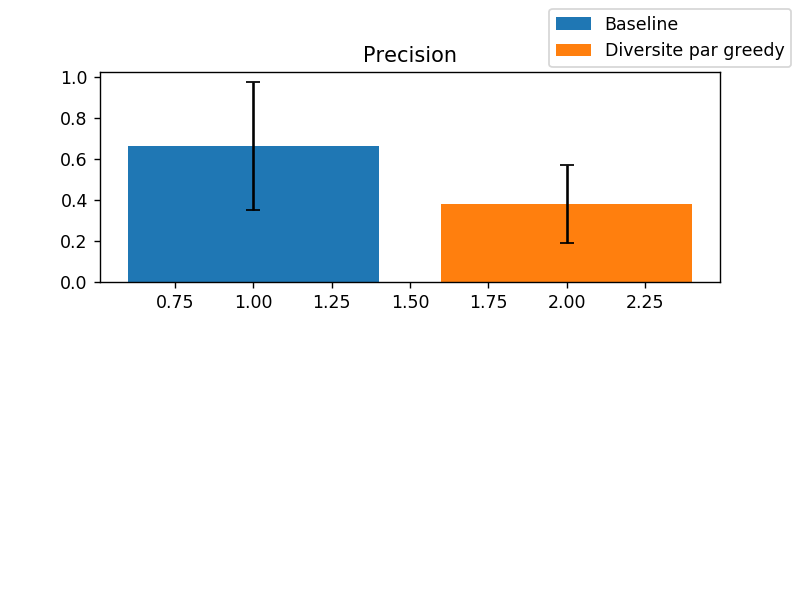

In [90]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
plt.title('Precision')

ax1.bar(1, baseline_result['precision_at_20'], yerr=baseline_result['precision_at_20_std'], capsize=4)
ax1.bar(2, greedy_results['precision_at_20'], yerr=greedy_results['precision_at_20_std'], capsize=4)

fig.legend(['Baseline', 'Diversite par greedy'])
plt.show()